<a href="https://colab.research.google.com/github/Zoya-Haris/Machine-Learning/blob/main/Titanic_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#7 Numerical and 5 Categorical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

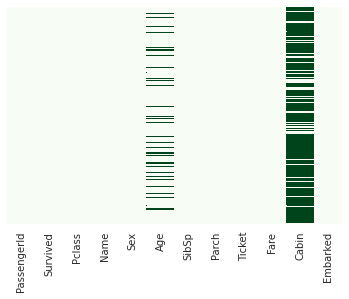

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap= 'Greens')

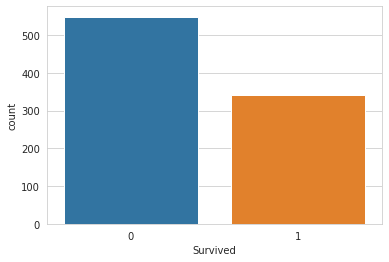

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data = df)




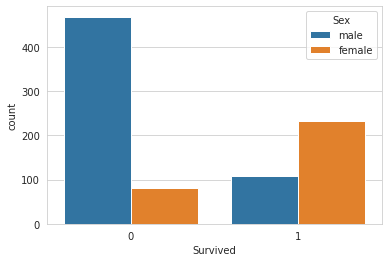

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue= 'Sex', data = df)

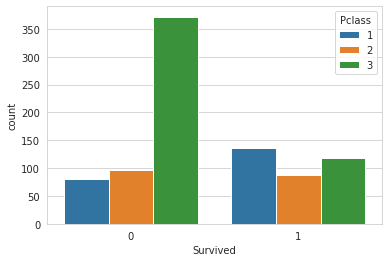

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue= 'Pclass', data= df)

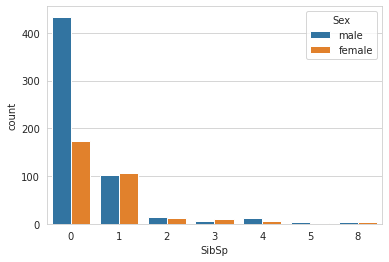

In [ ]:
sns.countplot(x='SibSp',hue='Sex',data=df)

In [ ]:
categor = [i for i in df.columns if df[i].dtype =='O']
print('There are {} categorical variables'.format(len(categor)))
print('Categorical variables are:','\n', categor)

There are 5 categorical variables
Categorical variables are: 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
df[categor].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df[categor].isnull().sum()*100/len(df[categor])

Name         0.000000
Sex          0.000000
Ticket       0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [ ]:
df[categor].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
categor1 = df[categor]

for col in categor1:

  categor1[col]=categor1[col].fillna(categor1[col].mode()[0])

categor1.isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
for var in categor1:
   print(var, 'has', len(df[var].unique()), 'Labels', '\n')
   print(var,':', df[var].unique(), '\n')

Name has 891 Labels 

Name : ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, 

In [ ]:
for var in categor1:
    print(var,'\n',df[var].value_counts(),'\n')

Name 
 Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

Sex 
 male      577
female    314
Name: Sex, dtype: int64 

Ticket 
 347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 

Cabin 
 B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148

In [ ]:
#dummification

Sex = pd.get_dummies(df['Sex'], drop_first = True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
Embark = pd.get_dummies(df['Embarked'], drop_first = True)
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
numer= [i for i in df.columns if df[i].dtype != 'O']
print ('There are {} numerical variables'.format(len(numer)))
print('Numerical variables are ','\n', numer)

There are 7 numerical variables
Numerical variables are  
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[numer].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
df[numer].isnull().sum()*100/len(df[numer])

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Fare            0.00000
dtype: float64

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df[numer].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [ ]:
df[numer].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


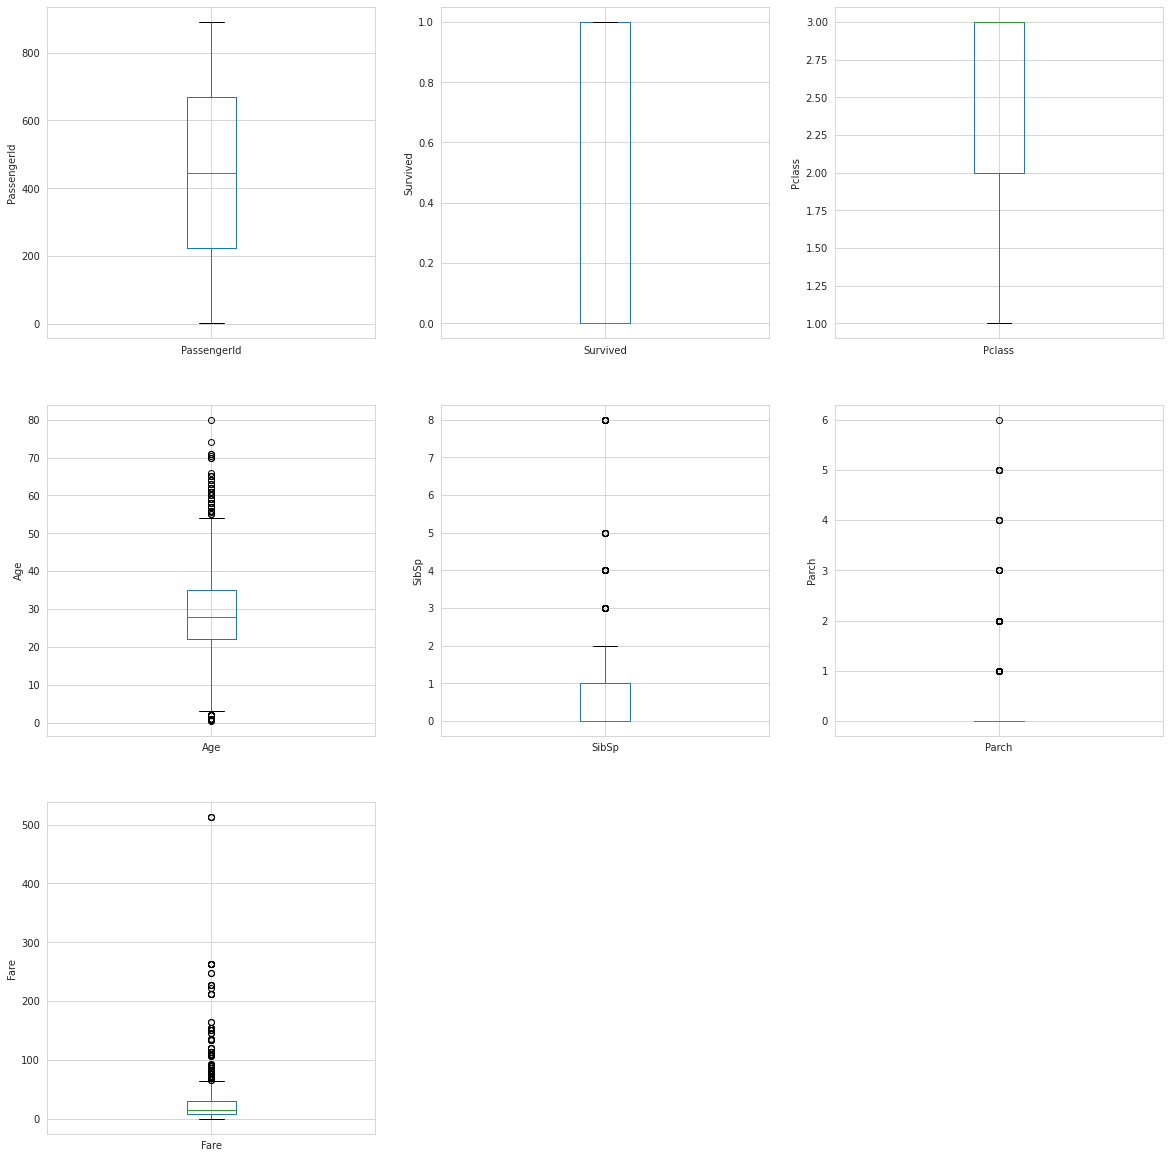

In [ ]:
# BOX PLOT FOR NUMERICAL VARIABLES
plt.figure(figsize=(20,50))

for i in numer:
   index = numer.index(i)
   plt.subplot(7,3,index+1)
   fig = df.boxplot(column=i)
   fig.set_title('')
   fig.set_ylabel(i)


PassengerId 
----------------
Q1: 223.5
Q3: 668.5
IQR: 445.0
Lower_fence: -444.0
Upper_fence: 1336.0 


Survived 
----------------
Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower_fence: -1.5
Upper_fence: 2.5 


Pclass 
----------------
Q1: 2.0
Q3: 3.0
IQR: 1.0
Lower_fence: 0.5
Upper_fence: 4.5 


Age 
----------------
Q1: 22.0
Q3: 35.0
IQR: 13.0
Lower_fence: 2.5
Upper_fence: 54.5 


SibSp 
----------------
Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower_fence: -1.5
Upper_fence: 2.5 


Parch 
----------------
Q1: 0.0
Q3: 0.0
IQR: 0.0
Lower_fence: 0.0
Upper_fence: 0.0 


Fare 
----------------
Q1: 7.9104
Q3: 31.0
IQR: 23.0896
Lower_fence: -26.724
Upper_fence: 65.6344 




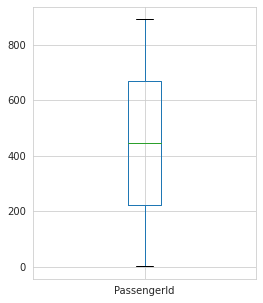

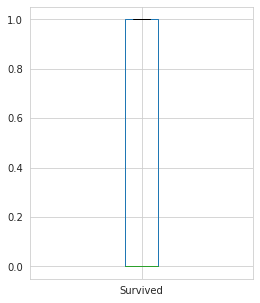

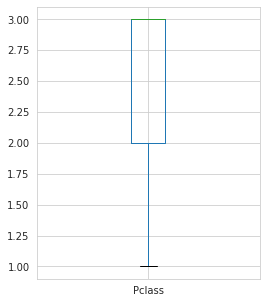

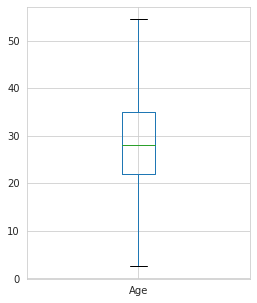

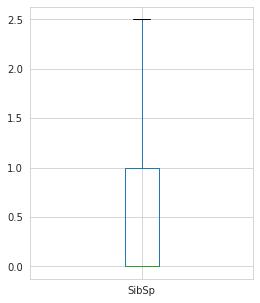

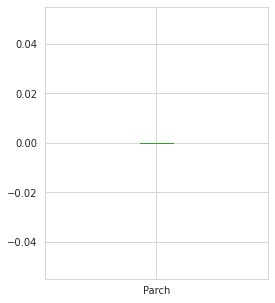

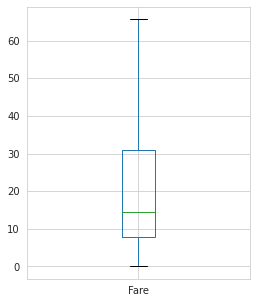

In [ ]:
#CAPPING OUTLIERS
for i in df[numer]:
  Q3=df[i].quantile(0.75)
  Q1=df[i].quantile(0.25)
  IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
  Lower_fence = Q1 - (IQR * 1.5)
  Upper_fence = Q3 + (IQR * 1.5)
  print(i, '\n----------------')
  print('Q1:', Q1)
  print('Q3:', Q3)
  print('IQR:', IQR)
  print('Lower_fence:', Lower_fence)
  print('Upper_fence:', Upper_fence, '\n\n')

  df[i] = np.where(df[i] > Upper_fence, Upper_fence, np.where(df[i] < Lower_fence, Lower_fence, df[i]))
  plt.figure(figsize=(4,5))
  fig= df.boxplot(column = i)

In [ ]:
df[numer].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.000000
mean,446.000000,0.383838,2.308642,29.039282,0.426487,0.0,24.046813
std,257.353842,0.486592,0.836071,12.072074,0.708246,0.0,20.481625
min,1.000000,0.000000,1.000000,2.500000,0.000000,0.0,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.0,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.0,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.0,31.000000
max,891.000000,1.000000,3.000000,54.500000,2.500000,0.0,65.634400


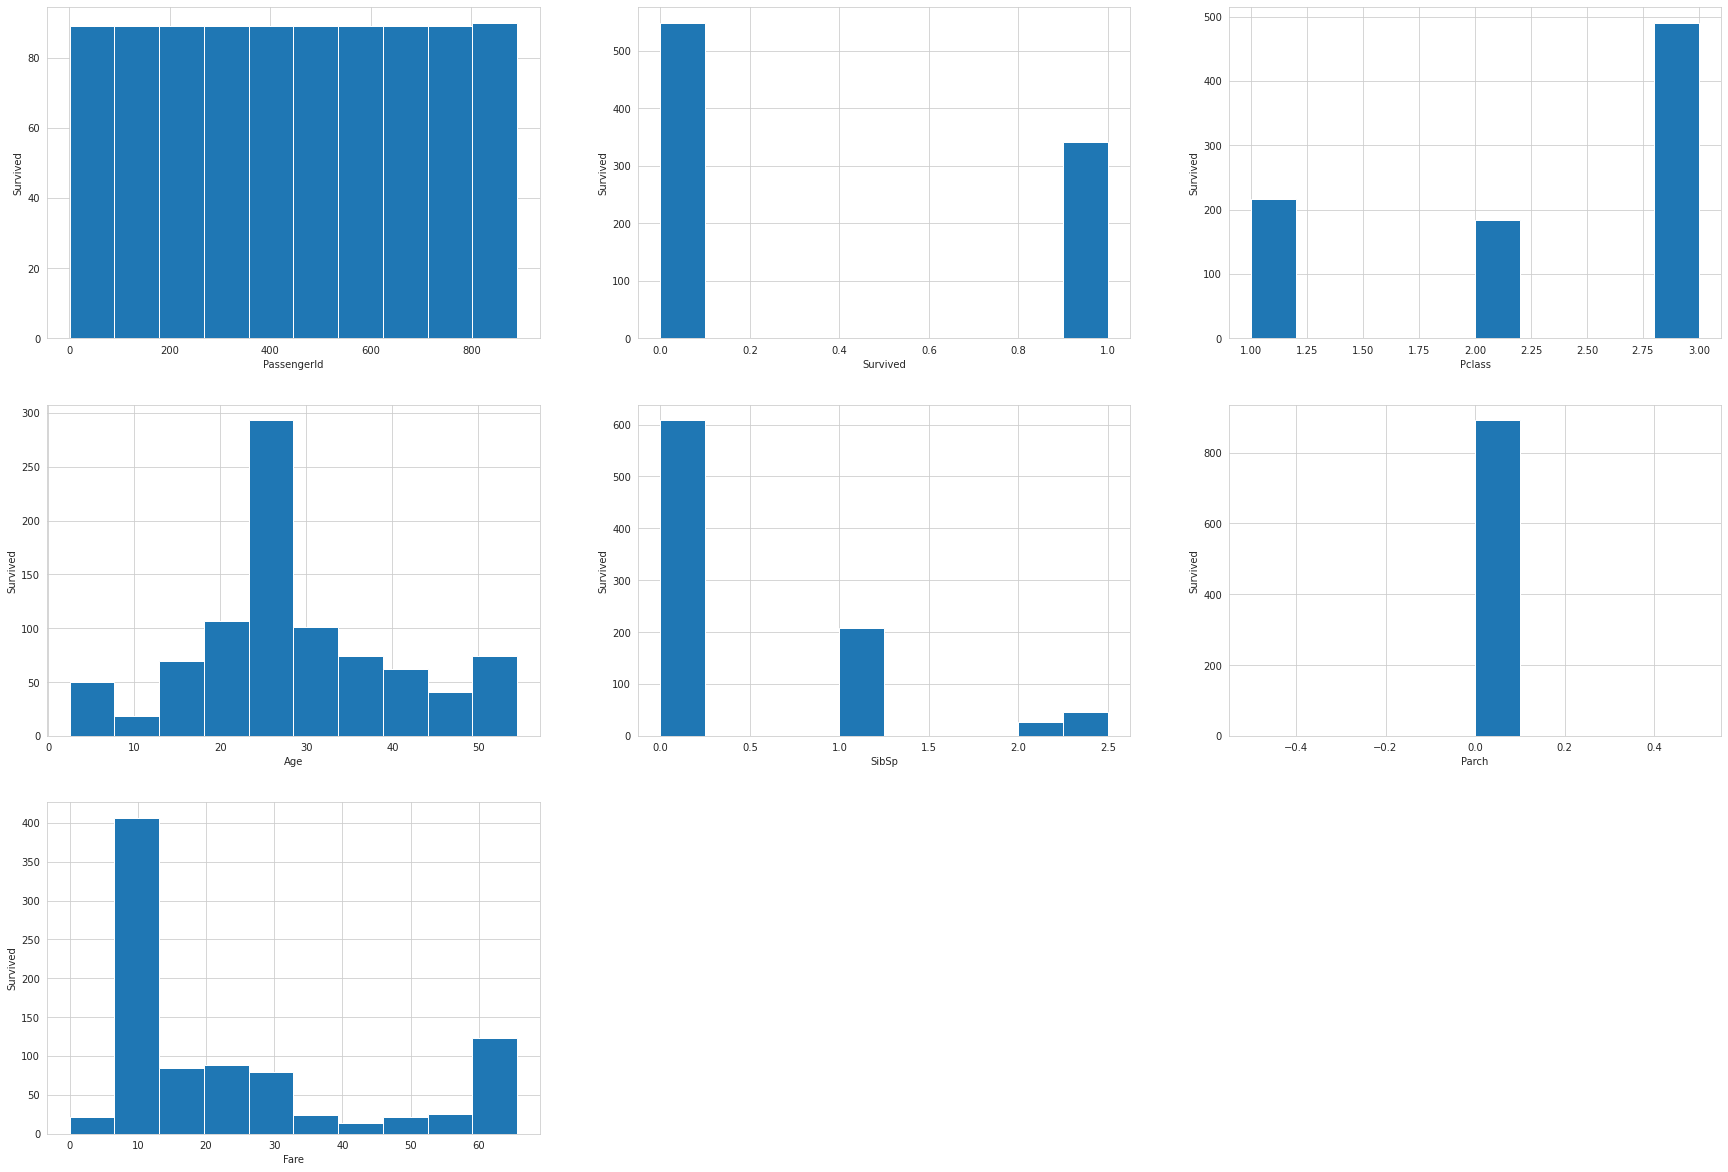

In [ ]:
# PLOT HISTOGRAM TO CHECK DISTRIBUTION
plt.figure(figsize= (30,50))

for i in numer:
   index=numer.index(i)
   plt.subplot(7, 3, index+1)
   fig = df[i].hist(bins=10)
   fig.set_xlabel(i)
   fig.set_ylabel('Survived')

In [ ]:
df_new = pd.concat([df,Sex,Embark], axis=1)

In [ ]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,65.6344,C85,C,0,0,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,0,0,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,1,0,1


In [ ]:
df_new.drop(['Name','Sex','Cabin','Embarked','Ticket'], axis = 1, inplace = True)

In [ ]:
df_new.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1,0,1
1,2.0,1.0,1.0,38.0,1.0,0.0,65.6344,0,0,0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0,0,1
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,0,1
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1,0,1


In [ ]:
X= df_new.drop('Survived', axis=1)
y= df[['Survived']]

In [ ]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,3.0,22.0,1.0,0.0,7.2500,1,0,1
1,2.0,1.0,38.0,1.0,0.0,65.6344,0,0,0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0,0,1
3,4.0,1.0,35.0,1.0,0.0,53.1000,0,0,1
4,5.0,3.0,35.0,0.0,0.0,8.0500,1,0,1


In [ ]:
y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y, test_size = 0.3, random_state = 0)

In [ ]:
xtrain.shape, ytrain.shape

((623, 9), (623, 1))

In [ ]:
xtest.shape, ytest.shape

((268, 9), (268, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred= logreg.predict(xtest)

In [ ]:
ypred

array([0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[148,  20],
       [ 31,  69]])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(ytest, ypred)))

Model accuracy score: 0.8097
